In [1]:
import pandas as pd
cv = pd.read_csv("b_depressed.csv")

In [2]:
cv.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [3]:
cv.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [7]:
cv.set_index('Survey_id', inplace=True)

In [8]:
cv.head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Survey_id,,,,,,,,,,,,,,,,,,,,,,
926,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1190,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1065,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
806,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [12]:
cv.query('depressed == 1').head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Survey_id,,,,,,,,,,,,,,,,,,,,,,
747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
849,130,0,34,0,1,9,3,41303144,21925041,23399979,66730708,10890451,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
540,52,1,84,0,0,1,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
603,100,1,56,1,0,12,2,93596368,21140288,5925687,34566505,72469551,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
1001,207,1,40,0,0,7,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [14]:
cv.query('depressed == 1').count()

Ville_id                 238
sex                      238
Age                      238
Married                  238
Number_children          238
education_level          238
total_members            238
gained_asset             238
durable_asset            238
save_asset               238
living_expenses          238
other_expenses           238
incoming_salary          238
incoming_own_farm        238
incoming_business        238
incoming_no_business     238
incoming_agricultural    238
farm_expenses            238
labor_primary            238
lasting_investment       238
no_lasting_investmen     235
depressed                238
dtype: int64

In [17]:
cv.groupby(by='depressed').size()

depressed
0    1191
1     238
dtype: int64

In [18]:
cv.describe()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [23]:
cv = cv.dropna()

In [25]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 926 to 231
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ville_id               1409 non-null   int64  
 1   sex                    1409 non-null   int64  
 2   Age                    1409 non-null   int64  
 3   Married                1409 non-null   int64  
 4   Number_children        1409 non-null   int64  
 5   education_level        1409 non-null   int64  
 6   total_members          1409 non-null   int64  
 7   gained_asset           1409 non-null   int64  
 8   durable_asset          1409 non-null   int64  
 9   save_asset             1409 non-null   int64  
 10  living_expenses        1409 non-null   int64  
 11  other_expenses         1409 non-null   int64  
 12  incoming_salary        1409 non-null   int64  
 13  incoming_own_farm      1409 non-null   int64  
 14  incoming_business      1409 non-null   int64  
 15  inc

In [29]:
from sklearn.model_selection import train_test_split

X= cv.iloc[:, :-1].values
y= cv.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3,random_state=0)

In [30]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred = classifier.predict(X_test)

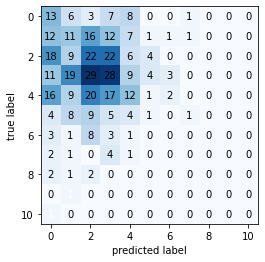

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matriz_confusion = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusion)
plt.show()